In [1]:
cd matlab
pwd
clear all
imatlab_export_fig('print-svg')  % Static svg figures.
format compact

ans =
    '/Users/eechris/code/src/github.com/cpjobling/eglm03-textbook/05/1/matlab'


In [2]:
nG = 1; dG = [1, 1, 0];
G = tf(nG,dG);
H = tf(1,1);
Go = G; 

In [3]:
w = logspace(-1,2);  

In [4]:
[m0,p0] = bode(Go,w);

In [5]:
m0dB = 20*log10(m0);
m0dB = reshape(m0dB,length(w),1);
p0 = reshape(p0,length(w),1);

In [6]:
[Ao,Bo,Co,Do]=ssdata(Go);

In [7]:
am0dB = asymp(Ao,Bo,Co,Do,w);

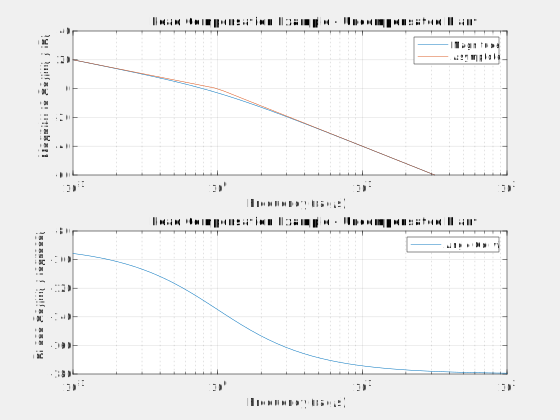

In [8]:
subplot(211)
semilogx(w,m0dB,w,am0dB),...
   axis([0.1, 100, -60, 40]),...
   title('Lead Compensation Example - Uncompensated Plant'),...
   legend('Magnitude','Asymptote'),ylabel('Magnitude Go(jw) (dB)'),xlabel('Frequency (rad/s)'),...
   grid
subplot(212)
semilogx(w,p0),...
   title('Lead Compensation Example - Uncompensated Plant'),...
   legend('Angle Go(jw)'),ylabel('Phase Go(jw) (degrees)'),xlabel('Frequency (rad/s)'),...
   grid

In [9]:
Kv = 10;
Kc = Kv;

In [10]:
KcGo = Kc*Go;  

In [11]:
[m1,p1] = bode(KcGo,w);
m1dB = 20*log10(m1);
m1dB = reshape(m1dB,length(w),1);
p1 = reshape(p1,length(w),1);

In [12]:
[A1,B1,C1,D1]=ssdata(KcGo);
am1dB = asymp(A1,B1,C1,D1,w);

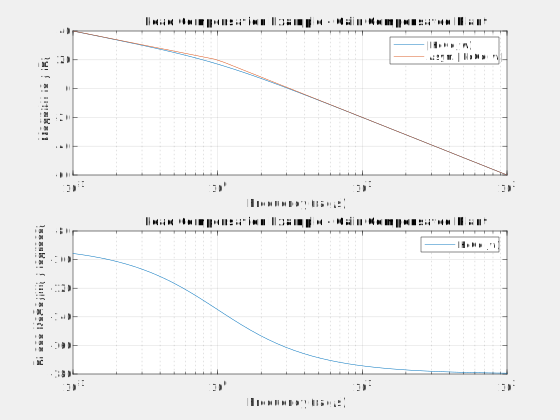

In [13]:
clf
subplot(211)
semilogx(w,m1dB,w,am1dB),...
   axis([0.1, 100, -60, 40]),...
   title('Lead Compensation Example - Gain Compensated Plant'),...
   legend('|KcGo(jw)|','Asym. |KcGo(jw)|'),...
   ylabel('Magnitude (dB)'),xlabel('Frequency (rad/s)'),...
   grid
% Phase is unchanged
subplot(212)
semilogx(w,p1),...
   title('Lead Compensation Example - Gain Compensated Plant'),...
   legend('KcGo(jw)'),ylabel('Phase KcGo(jw) (degrees)'),xlabel('Frequency (rad/s)'),...
   grid

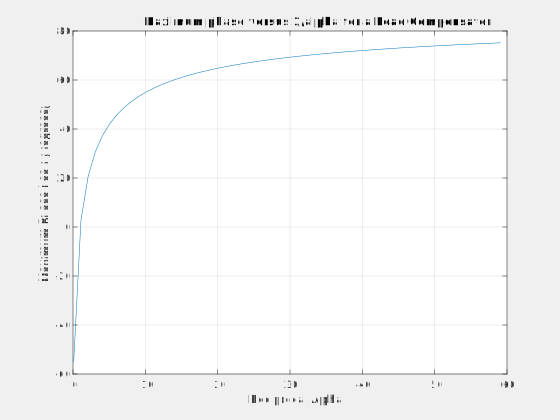

In [14]:
recipr_alpha = 0.1:60;
alpha = 1./recipr_alpha;
subplot(111)
plot(recipr_alpha,asin((1 - alpha)./(1 + alpha))*180/pi),...
   grid,...
   title('Maximum phase versus 1/alpha for a Lead Compensator'),...
   xlabel('Reciprocal Alpha'),...
   ylabel('Maximum Phase Lead (degrees)')

In [15]:
phi_max = 45*pi/180; % angles in Matlab always in radians
sin_Pm = sin(phi_max);
alpha = (1 - sin_Pm)/(1 + sin_Pm)

alpha =
    0.1716


In [16]:
w1 = 3;
T = 1/(sqrt(alpha)*w1);
aT = alpha*T;
D = tf([T, 1],[aT, 1])
D = zpk(D)


D =


  0.8047 s + 1


  ------------


  0.1381 s + 1


Continuous-time transfer function.




D =


  5.8284 (s+1.243)


  ----------------


     (s+7.243)


Continuous-time zero/pole/gain model.



In [17]:
[md,pd] = bode(D,w);
mddB = 20*log10(md);
mddB = reshape(mddB,length(w),1);
pd = reshape(pd,length(w),1);

In [18]:
[Ad,Bd,Cd,Dd]=ssdata(D);
amddB = asymp(Ad,Bd,Cd,Dd,w);

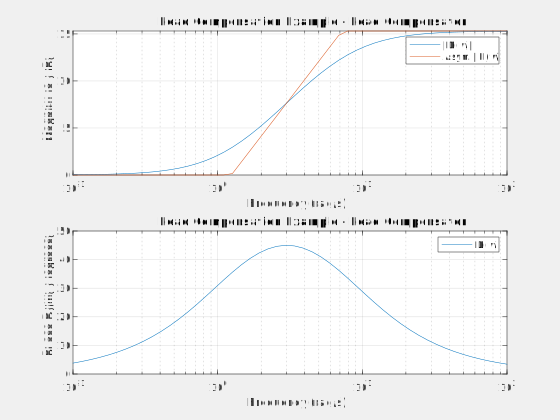

In [19]:
clf
subplot(211)
semilogx(w,mddB,w,amddB),...
   title('Lead Compensation Example - Lead Compensator'),...
   legend('|D(jw)|','Asym. |D(jw)|'),...
   ylabel('Magnitude (dB)'),xlabel('Frequency (rad/s)'),...
   grid
% Phase is unchanged
subplot(212)
semilogx(w,pd),...
   title('Lead Compensation Example - Lead Compensator'),...
   legend('D(jw)'),ylabel('Phase D(jw) (degrees)'),xlabel('Frequency (rad/s)'),...
   grid

In [20]:
KcDG = series(Kc*D,Go);
[m2,p2] = bode(KcDG,w);
m2dB = 20*log10(m2);
m2dB = reshape(m2dB,length(w),1);
p2 = reshape(p2,length(w),1);

In [21]:
[A2,B2,C2,D2]=ssdata(KcDG);
am2dB = asymp(A2,B2,C2,D2,w);

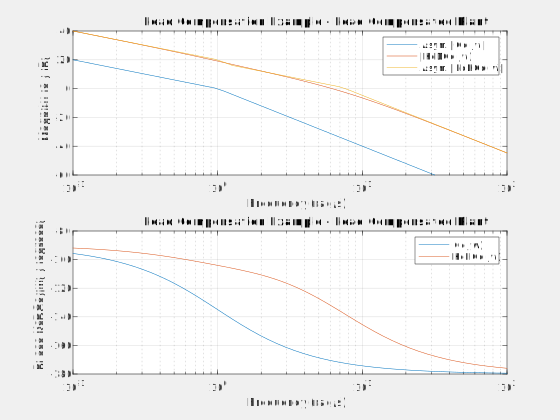

In [22]:
clf
subplot(211)
semilogx(w,am0dB,w,m2dB,w,am2dB),...
   axis([0.1, 100, -60, 40]),...
   title('Lead Compensation Example - Lead Compensated Plant'),...
   legend('Asym. |Go(jw)|','|KcDGo(jw)|','Asym. |KcDGo(jw)|'),...
   ylabel('Magnitude (dB)'),xlabel('Frequency (rad/s)'),...
   grid
% Phase ...
subplot(212)
semilogx(w,p0,w,p2),...
   title('Lead Compensation Example - Lead Compensated Plant'),...
   legend('Go(jw)','KcDGo(jw)'),ylabel('Phase KcDGo(jw) (degrees)'),xlabel('Frequency (rad/s)'),...
   grid  

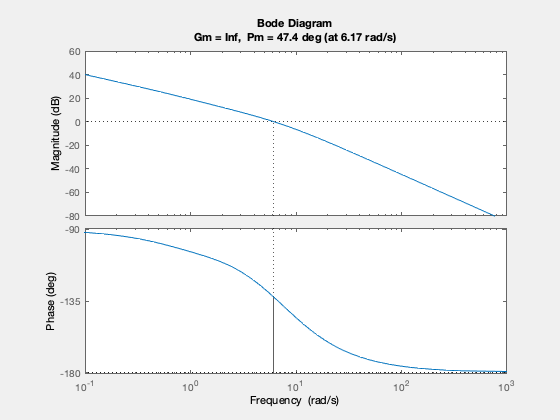

In [23]:
clf
margin(KcDG)

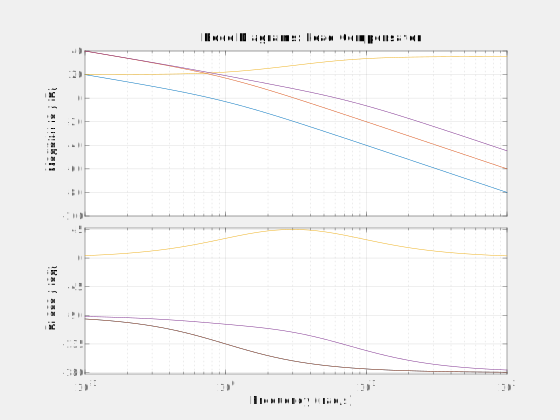

In [24]:
% Bode 
%  blue -- Uncompensated Go(jw)
%  green - Gain compensated KcGo(jw)
%  red -- Lead Compensator KcD(jw)
%  cyan -- Lead Compensated D(jw)Go(jw)
bode(Go,KcGo,Kc*D,KcDG,w),...
   title('Bode Diagrams: Lead Compensator'),...
   grid

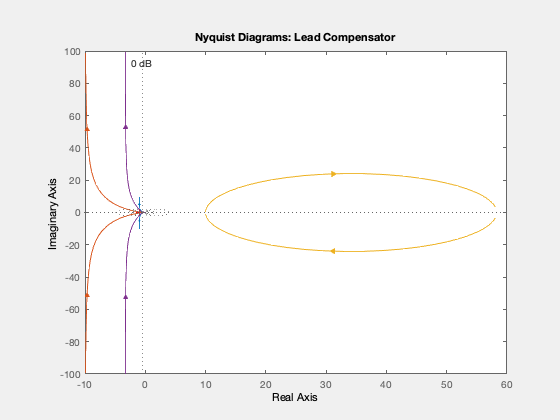

In [25]:
% Nyquist 
%  blue -- Uncompensated Go(jw)
%  green - Gain compensated KcGo(jw)
%  red -- Lead Compensator KcD(jw)
%  cyan -- Lead Compensated D(jw)Go(jw)
nyquist(Go,KcGo,Kc*D,KcDG,w)
   title('Nyquist Diagrams: Lead Compensator'),...
   grid

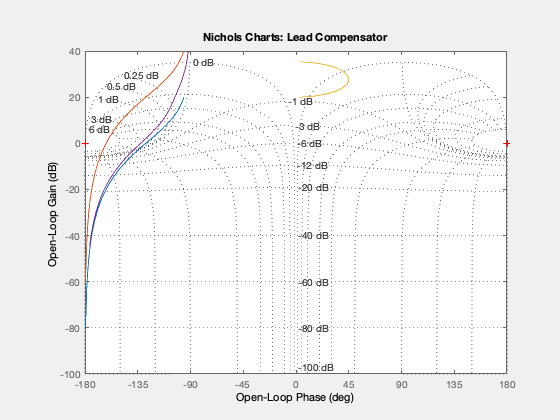

In [26]:
% Nichols
%  blue -- Uncompensated Go(jw)
%  green - Gain compensated KcGo(jw)
%  red -- Lead Compensator KcD(jw)
%  cyan -- Lead Compensated D(jw)Go(jw)
nichols(Go,KcGo,Kc*D,KcDG,w)
   title('Nichols Charts: Lead Compensator'),...
   grid

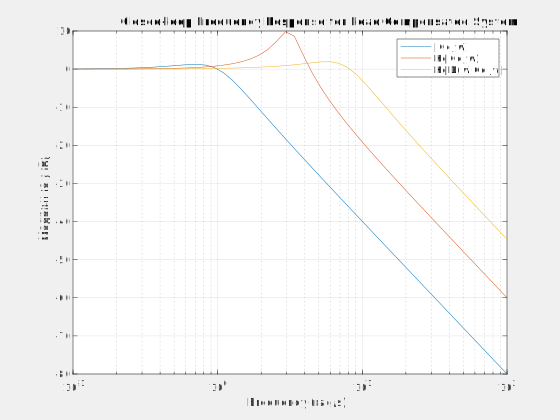

In [27]:
Gc0 = feedback(Go,1);
Gc1 = feedback(KcGo,1);
Gc2 = feedback(KcDG,1);
[mc0,pc0]=bode(Gc0,w);
[mc1,pc1]=bode(Gc1,w);
[mc2,pc2]=bode(Gc2,w);
mc0 = 20.*log10(reshape(mc0,length(w),1));
mc1 = 20.*log10(reshape(mc1,length(w),1));
mc2 = 20.*log10(reshape(mc2,length(w),1));
semilogx(w,mc0,w,mc1,w,mc2),...
   grid,...
   title('Closed-loop Frequency Response for Lead Compensated System'),...
   legend('|Go(jw)|','Kc|Go(jw)|','Kc|D(jw)Go(jw)|'),...
   xlabel('Frequency (rad/s)'),...
   ylabel('Magnitude (dB)')

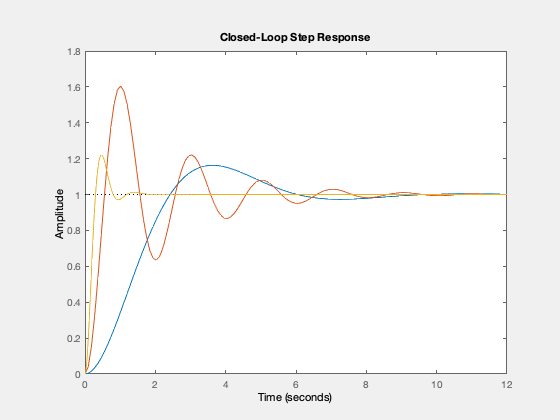

In [28]:
% Blue – uncompensated
% Green - gain compensated
% Red - lead compensated
step(Gc0,Gc1,Gc2),title('Closed-Loop Step Response')

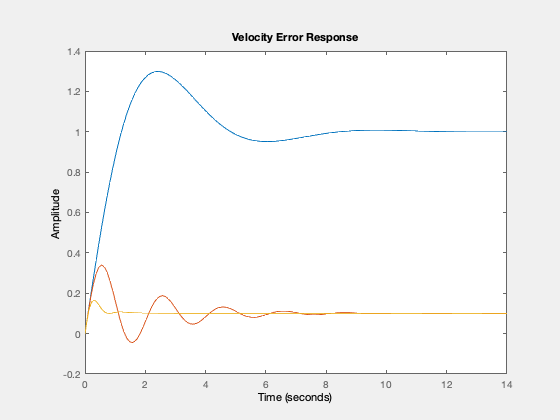

In [29]:
integ=tf(1,[1 0]);
re0 = integ*(1/(1 + Go));
re1 = integ*(1/(1 +KcGo));
re2 = integ*(1/(1 + KcDG));
clf
step(re0,re1,re2), title('Velocity Error Response')

In [30]:
edit matlab/asymp.m